##### 1. Recall we have three data points

$$(x_1, y_1)=(3,5),\, (x_2, y_2)=(4,6),\, (x_3, y_3)=(1,4)$$

We write the model as

$$\mathbf{y}=A\mathbf{\theta}$$

where

$$\mathbf{y}=\begin{bmatrix} 5 \\ 6 \\ 4 \end{bmatrix},\, A=\begin{bmatrix} 3 & 1 \\ 4 & 1 \\ 1 & 1\end{bmatrix},\, \mathbf{\theta}=\begin{bmatrix} a \\ b \end{bmatrix}$$

and we can use the following to obtain $\mathbf{\theta}$

$$\mathbf{\theta}=(A^TA)^{-1}A^T\mathbf{y}$$

where $A^T$ is `transpose` of $A$

However, the problem with such method is that computing inverse is not (always) easy or desirable, especially when the size of matrix is large

As a result, in practice, `iterative numerical` approach is often used

##### 2. The iterative method follows these steps

* We `guess` $a$ and $b$ initially
* We plug in guessed value and compute $A\mathbf{\theta}$ to get `predicted` output $\mathbf{y_{pred}}$
* We compared the output $\mathbf{y_{pred}}$ with the `actual` data $\mathbf{y_{act}}$, and compute the difference $\mid A\mathbf{\theta}-\mathbf{y_{act}}\mid^2$
* We call this difference the `cost function` or `loss function` $J$
* We adjust $a$ and $b$ in the next iteration in a `direction` such that $J$ will "likely" be reduced
* This direction is the direction of `negative gradient` of $J$ with respect to $a$ and $b$, as the gradient of function always points to the direction where its value increases

##### 3. To compute the gradient, we can plug in each data sample and computes the cost corresponding to each, and then add them together

$$J=\frac{1}{m}\sum_{i=1}^{m}\,(y_{\text{pred},i}-y_{\text{act},i})^2$$

where $m$ is the number of data samples used to find the model parameters (here, $m=3)$, and $y_{\text{pred,i}}=a\cdot x_i+b$

##### 4. Now the gradient with respect to $a$ and $b$

$$\begin{align}
\frac{\partial J}{\partial a}&=\frac{1}{m}\sum_{i=1}^{m}\,(a\cdot x_i+b-y_{\text{act},i})\cdot x_i\\
\frac{\partial J}{\partial b}&=\frac{1}{m}\sum_{i=1}^{m}\,(a\cdot x_i+b-y_{\text{act},i})\cdot 1
\end{align}$$

##### 5. These two equations can be written in `matrix` form as well

For example, `dJa=np.mean((y_pred)-(y_act))*x` where y_pred is a vector

$$\text{y_pred}=\begin{bmatrix} y_{\text{pred},1} \\ y_{\text{pred},2} \\ y_{\text{pred},3} \end{bmatrix}$$

y_act is also a vector

$$\text{y_act}=\begin{bmatrix} y_{\text{act},1} \\ y_{\text{act},2} \\ y_{\text{act},3} \end{bmatrix}$$

so is x

$$\text{x}=\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$$

When we do `dJa=np.mean((y_pred)-(y_act))*x`, numpy first carries out element-wise operation

$$\begin{bmatrix} (y_{\text{pred},1}-y_{\text{act},1})\cdot x_1 \\ (y_{\text{pred},2}-y_{\text{act},2})\cdot x_2 \\ (y_{\text{pred},3}-y_{\text{act},3})\cdot x_3 \end{bmatrix}$$

Then, it takes the `average` of all elements, making it equivalent to $\frac{\partial J}{\partial a}$ as described above

Same goes for $\frac{\partial J}{\partial b}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

In [2]:
data_points = np.array([[3, 5], [4, 6], [1, 4]])
x = data_points[:, 0] # a vector of three elements (3,)
y = data_points[:, 1] # also a vector of three elements (3,)

In [3]:
learning_rate = 0.05
iterations = 2000

# Initial guess
a = 0.0
b = 0.0

In [4]:
for i in range(iterations):
    # Make predictions using current a and b
    y_pred = a * x + b

    # Compute gradients using vectors directly
    da = np.mean((y_pred - y) * x)
    db = np.mean(y_pred - y)

    # Update a and b in negative gradient direction
    a -= learning_rate * da
    b -= learning_rate * db

# Final parameters
print(f"Final parameters: a = {a:.4f}, b = {b:.4f}")

Final parameters: a = 0.6429, b = 3.2857


Or, we can use the numpy inverse function `np.linalg.inv(A)` to compute $A^{-1}$ directly

In [5]:
A = np.hstack([x.reshape(-1, 1), np.ones((len(x), 1))]) # this is a matrix of size (3,2)
theta = np.linalg.inv(A.T@A)@A.T@y
theta

array([ 0.6429,  3.2857])

We see the results are the same

We can then plot the data points and line to see the results

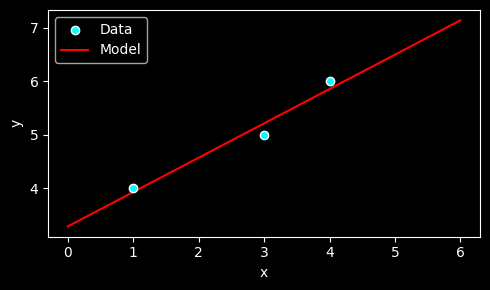

In [6]:
def prediction(x, theta):
    return theta[0]*x + theta[1]

fig, ax=plt.subplots(figsize=(5,3))

plt.scatter(A[:,0], y, color='cyan', label='Data', edgecolors='w')
ax.plot([0,6],[prediction(0, theta), prediction(6, theta)],'r-', label='Model', zorder=-5)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()
plt.legend()
plt.show()